## CPE 695 HWK 5 Programming Problem  --- Yuhui Ren

#### Design a genetic algorithm to solve the polynomial fitting problem that we did in HWK 1.

Lecture 11 P35 gives the pseudo-code for a mutation-only algorithm. In this assignment you need to implement a genetic algorithm using BOTH mutation AND crossover operations. Please refer to pages 13-16 of Lecture 11 for arithmetic crossover operations. You need to decide a mutation rate and a crossover rate.<br>

In [1]:
import numpy as np
import pandas as pd
import random

In [3]:
# generate x, y
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

# result from HWK 1
polynomial = np.polyfit(x[:,0], y[:,0], 3)  # Here, 3 is chosen for m    # the coefficients
y_polynomial = np.poly1d(polynomial)   # the function equation
y_polynomial

x = x.reshape(50,).tolist() # convert x to list
y = y.reshape(50,).tolist() # convert y to list

In [4]:
def create_100_arrays():     # create 100 6-element arrays
    arrays_100 = []
    for i in range(100):
        array = np.random.randint(0,9, size=6)
        arrays_100.append(array)
    return arrays_100

In [5]:
def compute_badness(x, y, array):       # define a function to compute badness  
    y_hat = array[0]*pow(x,5) + array[1]*pow(x,4) + array[2]*pow(x,3) + array[3]*pow(x,2) + array[4]*x + array[5]
    badness = (y - y_hat)**2
    
    return badness

In [6]:
def collect_100_badness(x, y, arrays):   # collect 100 badness numbers for 100 arrays
    badness_list = []
    for arr in arrays:
        badness_sum = 0
        for i in range(len(x)):
            badness = compute_badness(x[i], y[i], arr)
            badness_sum += badness
        badness_list.append(badness_sum)
    return badness_list

In [7]:
def pick_10_best_arrays(badness_list, arrays):  # pick 10 best arrays among the 100 arrays
    
    arrays_updated = []   # contain 10 best arrays
    
    # get 10 minimum badness numbers and their corresponding indice
    badness_idx = pd.DataFrame(badness_list, columns=['badness']).sort_values(['badness']).reset_index().iloc[0:10, :]
    
    indice = badness_idx['index'].values.tolist()
    for i in indice:
        arrays_updated.append(arrays[i])
    
    return arrays_updated

In [8]:
def mutation(arrays):       # generate 90 new mutation arrays using the 10 best arrays
    
    new_arrays_100 = []       # contain 100 arrays, 10 best arrays and 90 generated arrays
    
    for arr in arrays:
        new_arrays_100.append(arr)   # collect the old array
        
        for i in range(9):           # generate 9 arrays with each old array
            idx = np.random.choice([0,1,2,3,4,5])    # index of the element to be mutated
            m_rate = random.random()*2      # mutation rate
            arr_new = arr.copy()
            arr_new[idx] = arr_new[idx] * m_rate
            new_arrays_100.append(arr_new)
    
    return new_arrays_100

In [9]:
def crossover(arrays):      # reproduce offsprings from the 5 pairs of parents
    
    c_rate = 0.5   # crossover rate
    arrays_mutation_list = []   # to contain 5 pairs of parents (10 best arrays) & 9*5=45 pairs of offsprings(90 arrays).
    
    for i in range(0,10,2):  # every 2 arrays are 1 pair of parents, 10 best arrays make 5 pair of parents
        parent_1 = arrays[i]
        parent_2 = arrays[i+1]
        arrays_mutation_list.append(parent_1)
        arrays_mutation_list.append(parent_2)
    
        for j in range(9):    # every pair of parents reproduce 9 pairs (18) offsprings
            position = random.choice([0,1,2,3,4,5])   # pick a random index position for a single gene 
            child_1 = parent_1.copy()     
            child_1[position] = parent_1[position] * c_rate + parent_2[position] * c_rate  # Single arithmetic crossover
            child_2 = parent_2.copy()
            child_2[position] = parent_1[position] * c_rate + parent_2[position] * c_rate  # Single arithmetic crossover
            arrays_mutation_list.append(child_1)   
            arrays_mutation_list.append(child_2)    
        
    return arrays_mutation_list  # contain 100 arrays

In [10]:
# 500 loops for arrays' mutation and crossover

count = 0
arrays_100 = create_100_arrays()

while count<500: 
    badness_100 = collect_100_badness(x, y, arrays_100)
    arrays_10 = pick_10_best_arrays(badness_100, arrays_100)
    arrays_100_new = mutation(arrays_10)
    badness_100_new = collect_100_badness(x, y, arrays_100_new)
    arrays_10_new = pick_10_best_arrays(badness_100_new, arrays_100_new)
    arrays_100 = crossover(arrays_10_new)
    count =  count + 1;

In [11]:
def pick_best_array(x, y, arrays):      # find the best array among the 100 mutated arrays, i.e. the array with min badness
    
    badness_list = collect_100_badness(x, y, arrays)   # badness list containging 100 badness numbers for 100 arrays
    
    badness_min = min(badness_list)     # minimum badness, i.e. best array
    index_min = badness_list.index(badness_min)   # find the index
    
    array_best = arrays[index_min]

    return array_best

In [12]:
array_best = pick_best_array(x, y, arrays_100)   # best array after 200 times mutation and crossover

In [13]:
def generate_y_hats(x, array):
    
    y_hats = []

    for i in range(len(x)):
        y_hat = array[0]*pow(x[i],5) + array[1]*pow(x[i],4) + array[2]*pow(x[i],3) + array[3]*pow(x[i],2) + array[4]*x[i] + array[5]
        y_hats.append(y_hat)
    return y_hats

In [14]:
y_hats = generate_y_hats(x, array_best)  # generate y using the best array

Plot the following in one figure: 1) the original noisy data, 2) the polynomial you obtained in HWK 1, and 3) the polynomial obtained from this implementation.

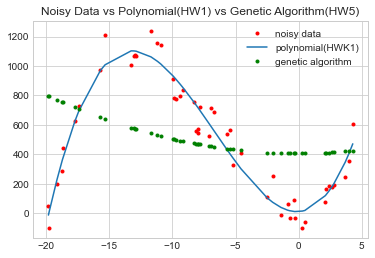

In [15]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
 
plt.plot(x, y, 'ro', label='noisy data', markersize=3)     # original data points
plt.plot(sorted(x), y_polynomial(sorted(x)), label='polynomial(HWK1)', markersize=3)   # polynomial line from HWK 1
plt.plot(x, y_hats, 'go', label='genetic algorithm', markersize=3)

plt.legend() 
plt.title('Noisy Data vs Polynomial(HW1) vs Genetic Algorithm(HW5)')
plt.show() 